<a href="https://colab.research.google.com/github/Richydrg/Fisica-de-particulas-I/blob/main/Invariant_mass_Ricardo_Del_Rosal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating Invariant Mass 

This activity uses data from the [CMS detector](https://cms.cern/detector) at CERN in Geneva, Switzerland. We've used this in [Quarknet's Data Camp at Fermilab](https://quarknet.org/page/data-camp-description) for several years to help teachers learn about particle physics.  

To get started,
- You won't hurt anything by experimenting. If you break it, close the tab and open the activity again to start over.
- Is this your first time? Need a refresher? Try the 5-minute [Intro to Coding activity](./intro.ipynb) and come back here. 

When you're ready, run each code cell until you get down to **Part One**.

In [ ]:
# imports some software packages we'll use
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

In [ ]:
# a hashtag tells the program "don't read the rest of the line"
# That way we can write "comments" to humans trying to figure out what the code does

two_u = pd.read_csv('https://github.com/adamlamee/HEP-data/raw/master/Double_Muon_Run2011A.csv')
#two_e = pd.read_csv('https://github.com/adamlamee/HEP-data/raw/master/Double_Electron_Run2011A.csv')
# units in these files are energy, E, in [GeV] and momentum, p, in [GeV/c]

data = two_u

In [ ]:
# The .head(n) command displays the first n rows of a file.
data.head(5)

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
0,165617,74601703,G,9.69873,-9.510430,0.366205,1.86329,9.51748,0.194546,3.10311,-1,G,9.76332,7.327710,-1.152370,6.34728,7.41776,0.775564,-0.155984,1
1,165617,75100943,G,6.20385,-4.266610,0.456545,-4.47930,4.29097,-0.912070,3.03499,-1,G,9.66898,7.273970,-2.821120,-5.71040,7.80188,-0.678625,-0.369977,1
2,165617,75587682,G,19.28920,-4.212080,-0.651623,18.81210,4.26219,2.190460,-2.98811,-1,G,9.82439,4.343940,-0.473505,8.79849,4.36967,1.449670,-0.108575,1
3,165617,75660978,G,7.04268,-6.326780,-0.268545,3.08025,6.33248,0.469033,-3.09917,-1,G,5.58571,4.474760,0.848935,-3.23185,4.55458,-0.660499,0.187488,1
4,165617,75947690,G,7.27507,0.102966,-5.533080,-4.72122,5.53403,-0.773616,-1.55219,-1,G,7.31811,-0.398831,6.940810,2.28247,6.95226,0.322677,1.628190,1


In [ ]:
# The .shape command displays the (number of rows , number of columns) in a file.
data.shape

(475465, 20)

## Part One
Let's get acquainted with this data set. It represents a pair of muons produced in a proton-proton collision (called an *event*). Look at the cells above to find the answers to the following questions:
- In the table above, what do you think each of the column headings represent?

  Run: Es el número de la corrida con el cual podemos buscarla para hallar mas información (fecha, hora, experimento, etc...).

  Event: Es el número de evento dentro de la corrida, con ese número podemos ubicar la información como la energía, momento, carga, etc...

  Type: Es el tipo de muon que detectó el sensor, puede ser muon global representado por la letra G o muon Tracker representado por la letra T. Los muones globales son mas confiables, pues los Tracker son reconstruccions de solo una parte del sensor. 

  E: Es la energía de la partícula.

  px, py, pz: Son los momentos de la partícula en los 3 ejes espaciales, x, y y z, respectivamente.

  pt: Es el momento transverso de la partícula, es decir su momento en los ejes x, y.

  eta: Es la pseudorapidez, el ángulo de salida de la partícula con respecto al eje del rayo de partículas.

  phi: Es el ángulo con el que existe entre la salida de ambos muones.

  Q: Es la carga de la partícula.

  *Los números 1 y 2 hacen referencia al muon que se formó.

- How many events does this data set contain?

  El dataset tiene 475,465 eventos, equivalente al número de columnas. 

When you're ready, scroll down to **Part 2**.

In [ ]:
# You can specify a column by dataset['columnName']
# This makes a new column called "p1Total" and fills it with sqrt(px1^2 + py1^2) for each event
# original: data['p1Total'] = (data['px1']**2 + data['py1']**2+)**.5
data['p1Total'] = (data['px1']**2 + data['py1']**2 + data['pz1']**2)**.5
data.head(3)

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,p1Total
0,165617,74601703,G,9.69873,-9.51043,0.366205,1.86329,9.51748,0.194546,3.10311,-1,G,9.76332,7.32771,-1.152370,6.34728,7.41776,0.775564,-0.155984,1,9.698156
1,165617,75100943,G,6.20385,-4.26661,0.456545,-4.47930,4.29097,-0.912070,3.03499,-1,G,9.66898,7.27397,-2.821120,-5.71040,7.80188,-0.678625,-0.369977,1,6.202945
2,165617,75587682,G,19.28920,-4.21208,-0.651623,18.81210,4.26219,2.190460,-2.98811,-1,G,9.82439,4.34394,-0.473505,8.79849,4.36967,1.449670,-0.108575,1,19.288892


## Part Two
Each muon has momentum and since they travel in 3 dimensions the momentum has three componenets. You can calculate the total momentum with the Pythogorean Theorem:  
- In 2 dimensions, it's the familiar:  
|p|<sup>2</sup> = p<sub>x</sub><sup>2</sup> + p<sub>y</sub><sup>2</sup>  
  
  
- In 3 dimensions, it looks like:  
|p|<sup>2</sup> = p<sub>x</sub><sup>2</sup> + p<sub>y</sub><sup>2</sup> + p<sub>z</sub><sup>2</sup>  
  
  
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Coord_XYZ.svg/2000px-Coord_XYZ.svg.png" alt="Drawing" width="200" height="200"/>  

Try editing the code in the cell above to use all 3 components of momentum to calculate muon 1's total momentum?

When you're ready, scroll down to **Part 3**.

In [ ]:
# original: data['m1'] = (data['E1'] + data['p1Total']) #This makes a new column called "m1" and fills it with E1 + p1 for each event

data["m1"]= np.sqrt(data["E1"]**2-data["p1Total"]**2)
data = data.fillna(0) # fills in a zero for any bad (imaginary) values your caluclation might produce
data.head(3)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,p1Total,m1
0,165617,74601703,G,9.69873,-9.51043,0.366205,1.86329,9.51748,0.194546,3.10311,-1,G,9.76332,7.32771,-1.152370,6.34728,7.41776,0.775564,-0.155984,1,9.698156,0.105495
1,165617,75100943,G,6.20385,-4.26661,0.456545,-4.47930,4.29097,-0.912070,3.03499,-1,G,9.66898,7.27397,-2.821120,-5.71040,7.80188,-0.678625,-0.369977,1,6.202945,0.105982
2,165617,75587682,G,19.28920,-4.21208,-0.651623,18.81210,4.26219,2.190460,-2.98811,-1,G,9.82439,4.34394,-0.473505,8.79849,4.36967,1.449670,-0.108575,1,19.288892,0.109086


## Part Three
Here's where relativity comes in. A particle's **energy** is due to it's **mass** and **momentum**. This equation is also similar to the Pythagoream theorem:  

<center>energy<sup>2</sup> = mass<sup>2</sup> + momentum<sup>2</sup></center>  

*Mass* in this equation is called the particle's *invariant mass* because it's a value all observers would agree on, regardless of their reference frame. The code above creates a column for the mass of muon 1, but the equation isn't quite right. Try editing the code in the cell above to *really* calculate muon 1's mass.  

When you're ready, scroll down to **Part 4**.

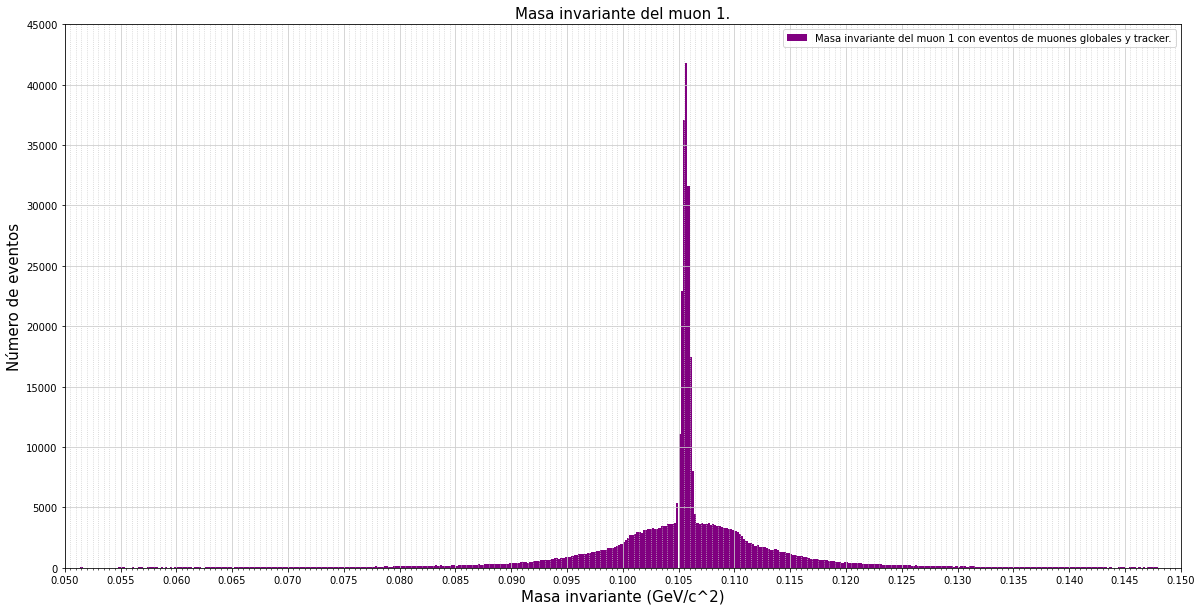

In [ ]:
"""
Original:

plt.hist(data['m1'], bins=5, range=[0,50], log=False)  # makes the histogram
plt.title("title me!")
plt.xlabel("x-axis label (in GeV/c^2)")
plt.ylabel("number of events")
plt.grid(True);
"""

fig, ax=plt.subplots(figsize=(20, 10))
plt.hist(data["m1"], 500, range = (0.05, 0.150), alpha=1, color="purple", label= "Masa invariante del muon 1 con eventos de muones globales y tracker.")
plt.xlabel("Masa invariante (GeV/c^2)", fontsize=15)
plt.ylabel("Número de eventos", fontsize=15)
plt.title("Masa invariante del muon 1.", fontsize=15)
plt.legend(loc="upper right")
ax.set_xlim(0.05, 0.150)
ax.set_ylim(0, 45000)
ax.xaxis.set_major_locator(MultipleLocator(.005))
ax.yaxis.set_major_locator(MultipleLocator(5000))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(1))
ax.grid(which='major', color='#CCCCCC', linestyle='-')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.show()


In [ ]:
#Calculo de la masa invariante del muon 2:
#Añadimos la columna del momento total del segundo muon y la de su masa invariante.
data['p2Total'] = (data['px2']**2 + data['py2']**2 + data['pz2']**2)**.5
data["m2"]= np.sqrt(data["E2"]**2-data["p2Total"]**2)
data = data.fillna(0) # fills in a zero for any bad (imaginary) values your caluclation might produce
data.head(3)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,p1Total,m1,p2Total,m2
0,165617,74601703,G,9.69873,-9.51043,0.366205,1.86329,9.51748,0.194546,3.10311,-1,G,9.76332,7.32771,-1.152370,6.34728,7.41776,0.775564,-0.155984,1,9.698156,0.105658,9.762748,0.105658
1,165617,75100943,G,6.20385,-4.26661,0.456545,-4.47930,4.29097,-0.912070,3.03499,-1,G,9.66898,7.27397,-2.821120,-5.71040,7.80188,-0.678625,-0.369977,1,6.202945,0.105586,9.668403,0.105586
2,165617,75587682,G,19.28920,-4.21208,-0.651623,18.81210,4.26219,2.190460,-2.98811,-1,G,9.82439,4.34394,-0.473505,8.79849,4.36967,1.449670,-0.108575,1,19.288892,0.105787,9.823820,0.105787


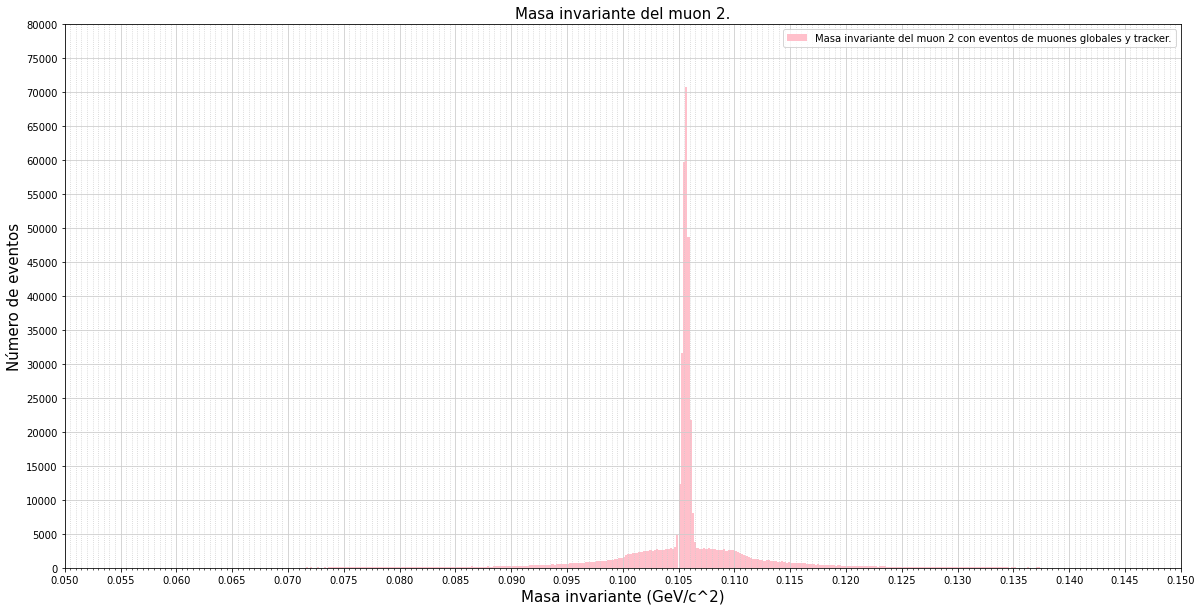

In [ ]:
#Gráfica de la masa invariante del muon 2:
fig, ax=plt.subplots(figsize=(20, 10))
plt.hist(data["m2"], 500, range = (0.05, 0.150), alpha=1, color="pink", label= "Masa invariante del muon 2 con eventos de muones globales y tracker.")
plt.xlabel("Masa invariante (GeV/c^2)", fontsize=15)
plt.ylabel("Número de eventos", fontsize=15)
plt.title("Masa invariante del muon 2.", fontsize=15)
plt.legend(loc="upper right")
ax.set_xlim(0.05, 0.150)
ax.set_ylim(0, 80000)
ax.xaxis.set_major_locator(MultipleLocator(.005))
ax.yaxis.set_major_locator(MultipleLocator(5000))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(1))
ax.grid(which='major', color='#CCCCCC', linestyle='-')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.show()

In [ ]:
#Masa invariante del electrón:
two_e = pd.read_csv('https://github.com/adamlamee/HEP-data/raw/master/Double_Electron_Run2011A.csv')
two_e.head(5)

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1


In [ ]:
#Numero de eventos 
two_e.shape

(100000, 18)

In [ ]:
#Calculo de la masa invariante del electron:
two_e['p1Total'] = (two_e['px1']**2 + two_e['py1']**2 + two_e['pz1']**2)**.5
two_e["m1"]= (two_e["E1"]**2-two_e["p1Total"]**2)**.5
two_e['p2Total'] = (two_e['px2']**2 + two_e['py2']**2 + two_e['pz2']**2)**.5
two_e["m2"]= (two_e["E2"]**2-two_e["p2Total"]**2)**.5
two_e = two_e.fillna(0)
two_e.head(5)

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,p1Total,m1,p2Total,m2
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,58.714133,0.000000,11.283628,0.000000
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,6.611878,0.004738,17.149193,0.015187
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,25.541867,0.041090,15.820325,0.000000
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,65.395924,0.000000,25.127377,0.000000
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,61.450347,0.081083,13.887097,0.009458


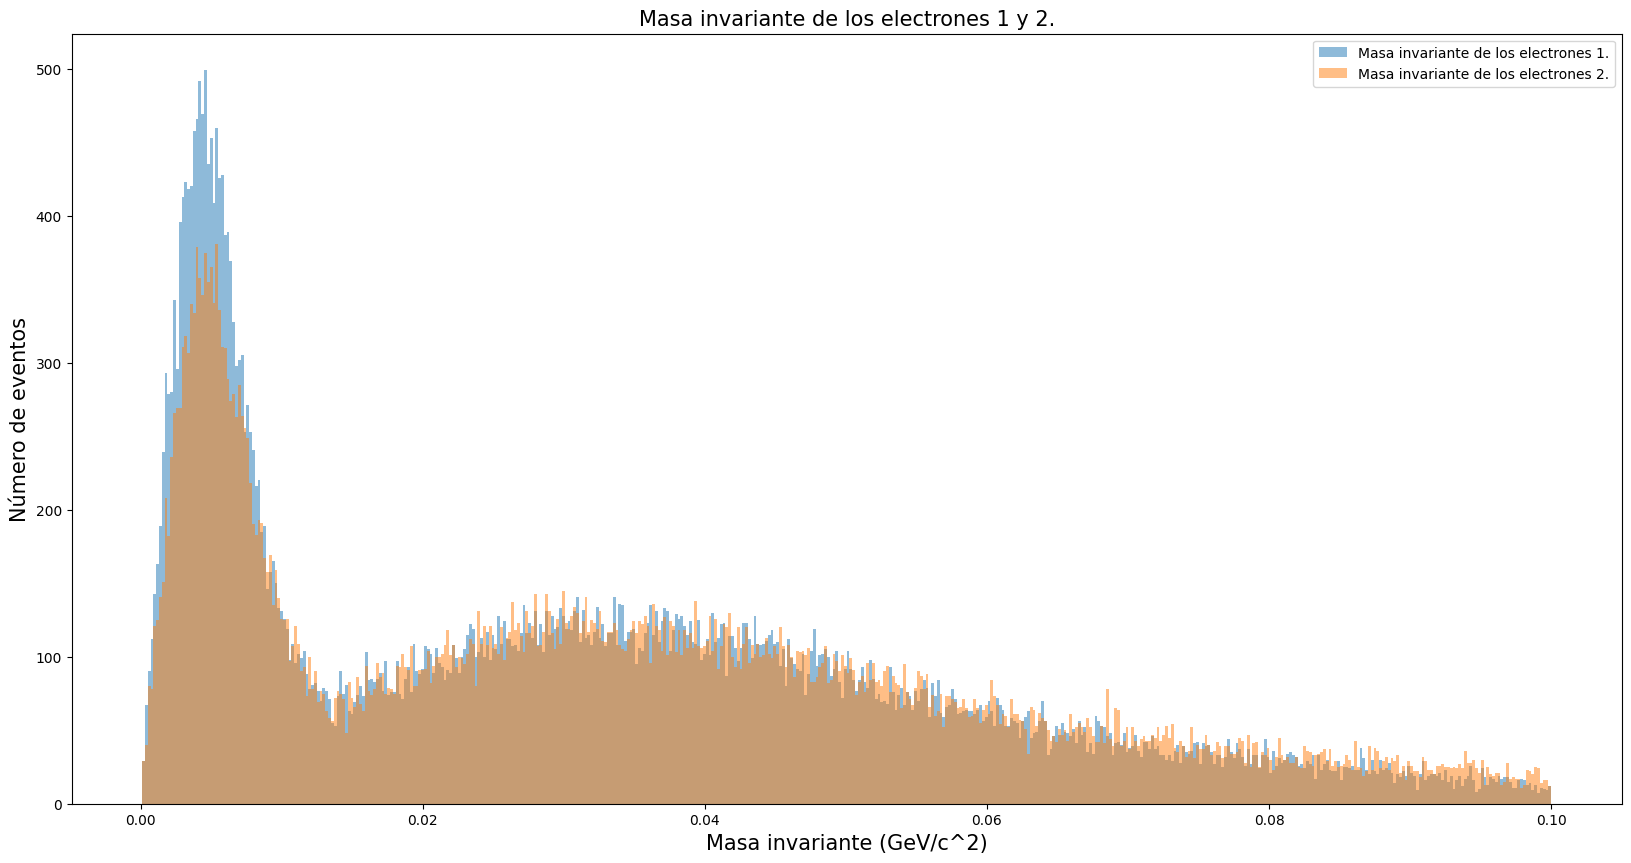

In [ ]:
#Gráfica de la masa invariante del electron
fig=plt.figure(figsize=(20, 10))
plt.hist(two_e["m1"], 500, range = (0.0001, .1), alpha=0.5, label= "Masa invariante de los electrones 1.")
plt.hist(two_e["m2"], 500, range = (0.0001, .1), alpha=0.5, label= "Masa invariante de los electrones 2.")
plt.xlabel("Masa invariante (GeV/c^2)", fontsize=15)
plt.ylabel("Número de eventos", fontsize=15)
plt.title("Masa invariante de los electrones 1 y 2.", fontsize=15)
plt.legend(loc="upper right")
plt.show()

## Part Four
The code above may take a few moments to run since it's grabbing a pretty big data set (>400,000 events!?). When it's finished, you'll see a histogram of the invariant mass values you calucalted for muon 1 in each event. This is called a *mass plot*.  
- You'll probably need to adjust the histogram's range and number of bins to see a clear peak. The x-value of that peak occurs at the invariant mass of the particle (in this case, a muon).
- Based on your histogram, what value does the muon's invariant mass seem to be?

  **El pico en la gráfica de masa invariante parece estar en los 0.1056 GeV/c^2**
- Try replacing the histogram's title and x-axis label to something better.  

## Part Five  
Now that you've analyzed your own huge set of particle collision events, here are some follow-up questions:
- How do the values you calculated compare to the accepted masses of the [electron](https://en.wikipedia.org/wiki/Electron) and the [muon](https://en.wikipedia.org/wiki/Muon). Are they very different, if so why might that be?

  La masa hallada para el muon es básicamente la aceptada, solo haría faltar aumentar la precisión. Sin embargo, no fui capaz de encontrar exactamente la masa del electón debido a que esta es muy pequeña (0.000511 GeV/c^2), así que en la gráfica que se obtuvo no se puede ver con claridad que el pico este aldedor de ese punto. 
- Why doesn't energy have x, y, and z components like momentum?
- How does E<sup>2</sup> - p<sup>2</sup> give you a unit of mass?

  Porque estamos usando los calculos relativistas y las unidades naturales, donde c=1, si no fuera así la ecuación para la energía debería ser: E<sup>2</sup>=(pc)<sup>2</sup>+(m<sub>0</sub>c<sup>2</sup>)<sup>2</sup>, despejando m<sub>0</sub> (la masa invariante) en esta ecuación usando unidades del SI vemos que si obtenemos unidades de masa.
- Try calculating m2 above by changing the existing values.

  También obtenemos una masa alrededor de 0.1056 GeV/c^2.
- The second code cell in this activity (toward the top) read in a large data file. It includes another option with electron data instead. Try calculating the electron's invariant mass and comparing it to the accepted mass of the [electron](https://en.wikipedia.org/wiki/Electron). How is it different? Why would that be? 

  Extraer información es complicado, pues por el número de eventos, lo pequeña que es la masa del electrón y que la masa calculada en muchos eventos no se acerca a la masa aceptada, por lo tanto no pude obtener una conclusión adecuada para la masa invariante del electrón. 

## More Tools  
The cells below show some more advanced tehniques.  

In [ ]:
# run this command to make your plots look like they're from xkcd.com
plt.xkcd();
# then re-execute your code to make a plot and see it xkcd-ified.

In [ ]:
# run this cell to make normal-looking plots again
mpl.rcdefaults()

A professional physicist would usually fit a theoretical curve to the mass plot to identify the particle's invariant mass. This is called a [relativistic Breit-Wigner](https://en.wikipedia.org/wiki/Relativistic_Breit%E2%80%93Wigner_distribution) curve.  
- First, choose some parameters for the curve based on where the peak is on your histogram and how wide it looks.  
- Then, run the code and keep adjusting the parameters until the curve tightly fits the peak.

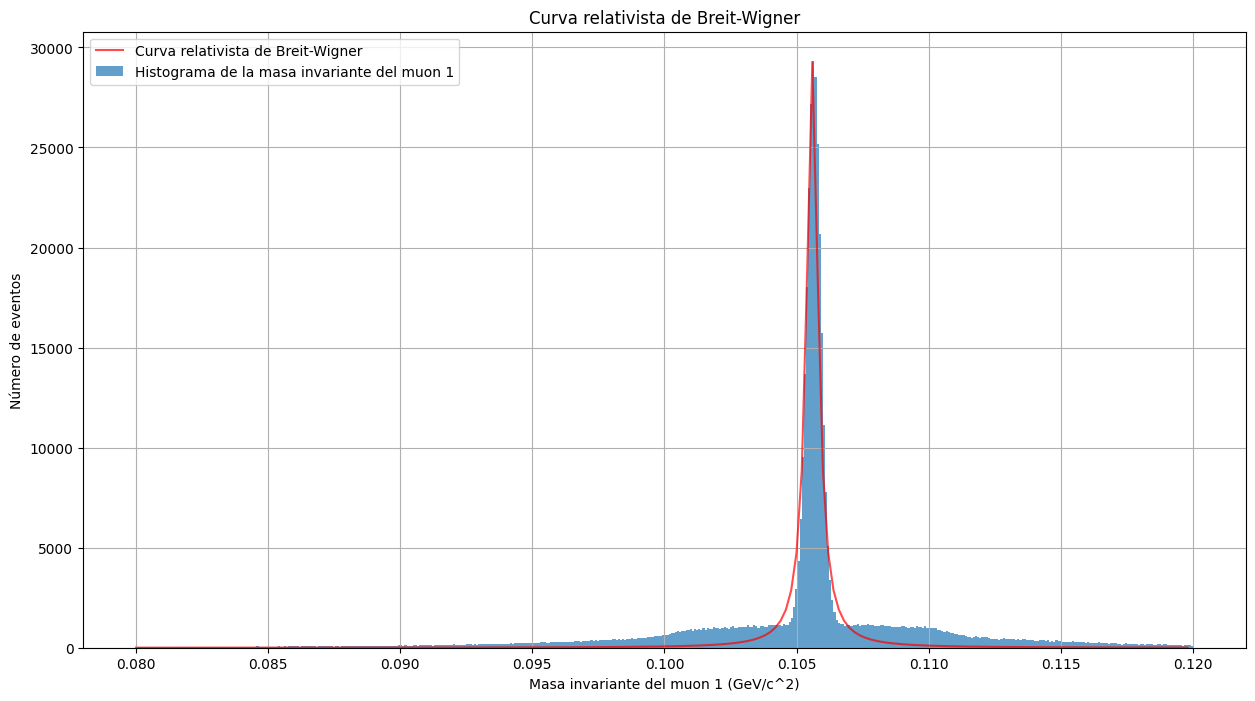

In [ ]:
"""
Original:
# set the Breit-Wigner parameters
xmin = 0  # lower bound for your plot
xmax = 1  # upper bound for your plot
particle_mass = .5 # the x-value of the peak
width = .02 # width of the peak halfway up; a.k.a. "full width at half max" or FWHM
K = 15  # a constant that affects the height of the curve, you'll need to tinker with this some

# calculate the Breit-Wigner curve
x = np.arange(xmin, xmax, (xmax-xmin)/200) # makes a series of equally spaced x-values
y = K / ((x - particle_mass)**2 + (particle_mass*width)**2) # calculates the y-values for the B-W curve

# make the plot
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.hist(data['m1'], bins=10, range=[xmin,xmax], log=False)  # plots the histogram
ax.plot(x, y, color='r')  # plots the curve
plt.title("title me!")
plt.xlabel("x-axis label (in GeV/c^2)")
plt.ylabel("number of events")
plt.grid(True);
"""

xmin=0.08
xmax=0.12
particle_mass=0.1056
width=0.0025
K=0.00204

x = np.arange(xmin, xmax, (xmax-xmin)/200)
y = K / ((x - particle_mass)**2 + (particle_mass*width)**2)

fig, ax = plt.subplots(figsize=(15,8))
plt.hist(data['m1'], bins=500, range=[xmin,xmax], alpha=.7, label= "Histograma de la masa invariante del muon 1")  # plots the histogram
plt.plot(x, y, color='r', alpha=.7, label= "Curva relativista de Breit-Wigner")  # plots the curve
plt.title("Curva relativista de Breit-Wigner")
plt.xlabel("Masa invariante del muon 1 (GeV/c^2)")
plt.ylabel("Número de eventos")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


If you finally have a curve that pretty closely fits the peak in your histogram, take a look at the parameters you set. The invariant mass of the particle is your *particle_mass*. The particle's mean lifetime is h-bar/width.  
- How do the values below compare with the accepted values for mass and lifetime of your particle?  

  La masa invariante aceptada para el muon es de 105.658 3755 MeV/c^2, con lo que 105.6 MeV/c^2 es un valor muy cercano al aceptado. En cambio, el valor obtenido para el tiempo de vida medio del muon esta muy, muy alejado del valor aceptado de 2.197 µs. Esto es debido al valor del width, el que da el tiempo de vida medio aceptado del muon debería ser cercano a 3e-16 (muy lejano al valor de 0.0025 para el width que yo obtuve), probablemente aumentando el número de eventos y mejorando la precisión obtendríamos el valor correcto del width que nos da el valor de 2.197 µs.
- Which one is a better measure? Why do you think that?

  La masa invariante es la mejor de las dos mediciones. Creo que esto es así porque el número de eventos y la precisión manejada aquí es suficiente para dar un claro pico en la masa invariante, pero no lo es para calcualar el tiempo de vida medio del muon.


In [ ]:
print("mass = ", np.round(particle_mass*1000,6), " MeV/c^2")
hbar = 6.6e-22      # in MeV*s
print("mean lifetime = ", np.format_float_scientific(hbar/width,6), " seconds")

mass =  105.6  MeV/c^2
mean lifetime =  2.64e-19  seconds


---  
## Saving Your Work  
This is running on a Google server on a distant planet and deletes what you've done when you close this tab. To save your work for later use or analysis you have a few options:  
- File > "Save a copy in Drive" will save it to you Google Drive in a folder called "Collaboratory". You can run it later from there.  
- File > "Download .ipynb" to save to your computer (and run with Jupyter software later)  
- File > Print to ... um ... print.  
- To save an image of a graph or chart, right-click on it and select Save Image as ...  

## Credits
This notebook was designed by [Quarknet](https://quarknet.org/) Teaching and Learning Fellow [Adam LaMee](https://adamlamee.github.io/) and UCF Physics undergrad Brooke Emison. The handy csv files were created from the CMS Run2011A primary datasets and converted from ROOT format by the masterful [Tom McCauley](https://github.com/tpmccauley). More can be found on the [CERN OpenData](http://opendata.cern.ch/?ln=en) site, like [here](http://opendata.cern.ch/record/545). The 3D vector image can be found on [WikiMedia Commons](https://commons.wikimedia.org/wiki/File:Coord_XYZ.svg). Finally, thanks to the great folks at [Binder](https://mybinder.org/) and [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) for making this notebook interactive without you needing to download it or install [Jupyter](https://jupyter.org/) on your own device. Find more activities and license info at [CODINGinK12.org](http://www.codingink12.org).